Вычислить с точность $10^{-3}$ координаты точек пересечения кривых :
 1) y = 0.5 - cos(x-1)
 2) x - cos(y) = 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', **{'size' : 22})

In [2]:
def f1(x):
    return 0.5-np.cos(x-1)
def f2(x):
    return 3 + np.cos(x)

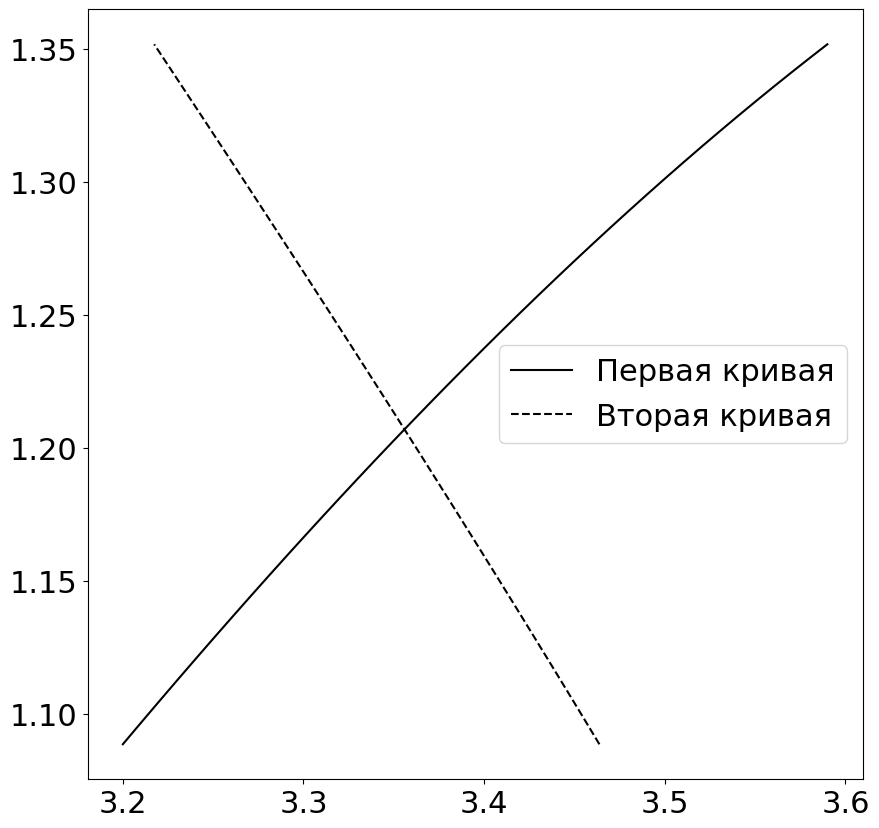

In [10]:
x_1 = np.arange(3.2 , 3.6 , 0.01) #Погирались и нашли , где примерно персечение
y_1 = f1(x_1)
y_2 = y_1
x_2 = f2(y_2)

plt.figure(figsize=(10, 10))
plt.plot(x_1,y_1 , 'k-', ms=15, label='Первая кривая')
plt.plot(x_2,y_2 , 'k--', ms=15, label='Вторая кривая')

plt.legend()
plt.show()

Построим процесс простых иттераций : сначал составим нелинейное уравнение 

f(x) = x - cos(0.5 - cos(x-1)) - 3 = 0

$x_n = cos(0.5 - cos(x_{n-1}-1)) + 3$

In [18]:
def g(x):
    return np.cos(0.5-np.cos(x-1)) + 3.0
def g_diff(x):
    return -1*np.sin(x-1)*np.sin(0.5-np.cos(x-1))
def MPI(x,k):
    for i in range(k):
        x = g(x)
    return x

Число шагов нужное до достижения точности 0.001 =  17.362897595851486
Првоерили отобр. на сжимающее и нашли корень х =  3.355873483035775
Тогда координаты пересечения (x ,y ) :  3.355873483035775 1.2068797584211066


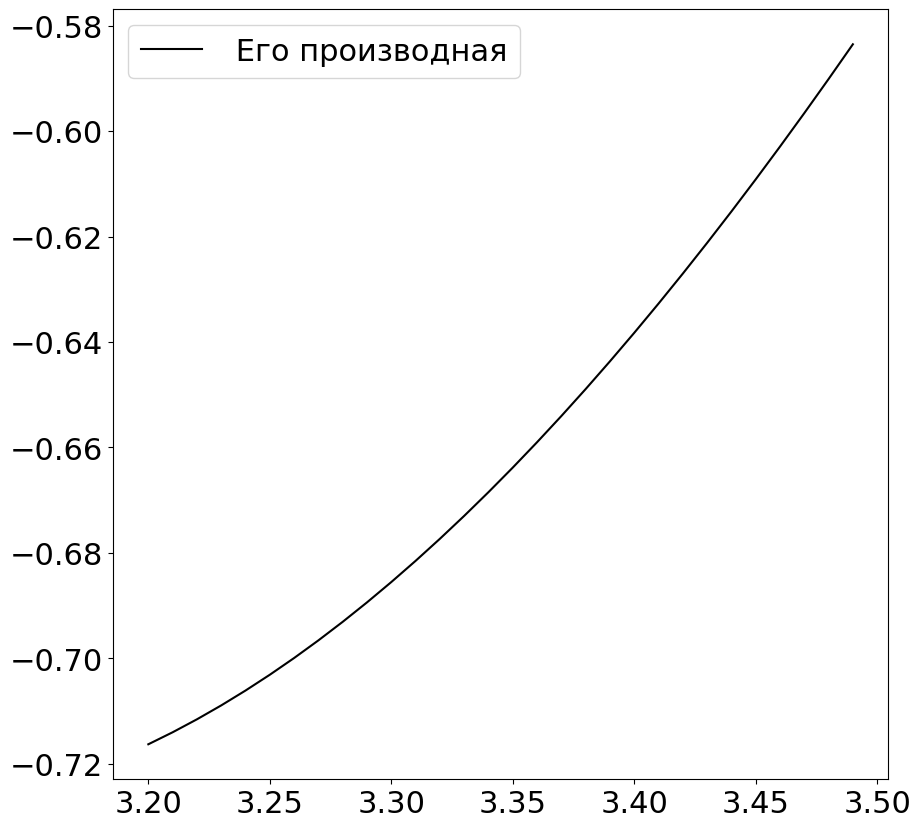

In [26]:
t = np.arange(3.2,3.5,0.01) #Отрезок для МПИ : [3.2,3.5]
y = g(t)
diffy = g_diff(t)
plt.figure(figsize=(10, 10))
#plt.plot(t,y , 'k-', ms=15, label='Сжимаюеее отображение ')
plt.plot(t,diffy , 'k-', ms=15, label=' Его производная') #Видим что на желаемом отрезке производная по модулю меньше 0.72 ,также наша g - монотонна на участке
q = 0.72
print("Число шагов нужное до достижения точности 0.001 = ", np.log(0.001/0.3)/np.log(0.72))
print("Првоерили отобр. на сжимающее и нашли корень х = ",MPI(3.4,17))
print("Тогда координаты пересечения (x ,y ) : ", MPI(3.4,17) , f1(MPI(3.4,17)) )
plt.legend()
plt.show()